start at: 2024-09-21 20:08:48
episode: 1 ======================================================================
[Deadline] wf.id: wf2, wf.deadline = 196511.16, wf.makespan = 842972.12, distance = -646460.96
[Deadline] wf.id: wf3, wf.deadline = 77541.56, wf.makespan = 1131953.82, distance = -1054412.26
[Deadline] wf.id: wf4, wf.deadline = 66213.60, wf.makespan = 1627988.38, distance = -1561774.78
[Deadline] wf.id: wf6, wf.deadline = 81718.39, wf.makespan = 1648147.07, distance = -1566428.68
[Deadline] wf.id: wf1, wf.deadline = 131578.01, wf.makespan = 1722323.98, distance = -1590745.97
[Deadline] wf.id: wf9, wf.deadline = 133212.77, wf.makespan = 1783592.14, distance = -1650379.37
[Deadline] wf.id: wf8, wf.deadline = 155402.51, wf.makespan = 1983249.33, distance = -1827846.82
[Deadline] wf.id: wf7, wf.deadline = 10947.01, wf.makespan = 1995432.72, distance = -1984485.71
[Budget] wf.id: wf10, wf.budget = 145.99, wf.cost = 147.88, distance = -1.89
[Deadline] wf.id: wf10, wf.deadline = 153

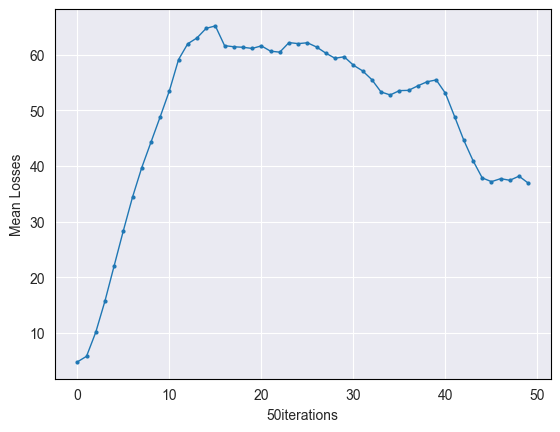

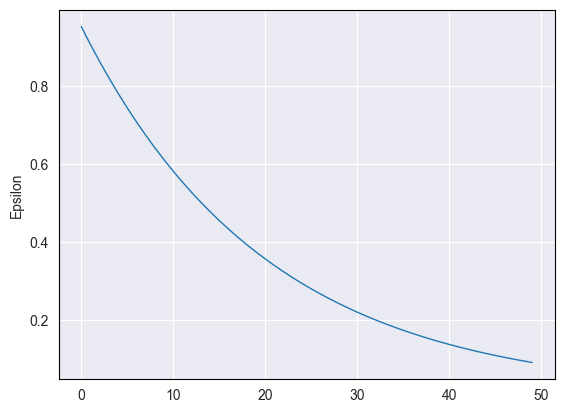

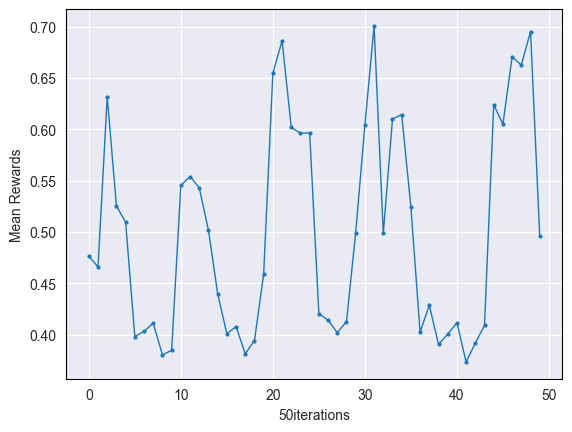

[Deadline] wf.id: wf8, wf.deadline = 100772.71, wf.makespan = 190493.65, distance = -89720.94
[Deadline] wf.id: wf2, wf.deadline = 122111.71, wf.makespan = 450051.65, distance = -327939.94
[Deadline] wf.id: wf6, wf.deadline = 223089.53, wf.makespan = 590995.00, distance = -367905.47
[Deadline] wf.id: wf1, wf.deadline = 33031.87, wf.makespan = 603948.07, distance = -570916.20
[Deadline] wf.id: wf7, wf.deadline = 222223.68, wf.makespan = 652137.02, distance = -429913.34
[Deadline] wf.id: wf4, wf.deadline = 130510.12, wf.makespan = 654649.33, distance = -524139.21
[Deadline] wf.id: wf3, wf.deadline = 43632.52, wf.makespan = 724619.01, distance = -680986.49
[Deadline] wf.id: wf10, wf.deadline = 160708.71, wf.makespan = 800455.55, distance = -639746.84
[Deadline] wf.id: wf9, wf.deadline = 62011.70, wf.makespan = 813149.70, distance = -751138.00
[Deadline] wf.id: wf5, wf.deadline = 88314.99, wf.makespan = 827596.82, distance = -739281.83
cost fail total : 0.0, makespan fail total : 10.0
epis

In [3]:
from env import IaaS , Workload
from env.workflow import Workflow
from rdwsEnv import runEnv
from schedule import Scheduler
from model.dqn import DQNScheduler
import torch
import torch.nn as nn
import datetime
import time  
from model.sac import SAC

# __init__ 初始化
random_seed = 50
buffer_size = 1000
batch_size = 512
target_update = 100
action_num = 16
state_dim =  6+3*action_num 
# 将某个事件的到达率从每分钟 0.1 次转换为每秒的到达率
arrival_rate = 0.1/60
train_path = 'train100'
save_model_path = 'model/sac_model.pth'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
episode_number = 10
wf_number = 10
# 平衡预算和时间的参数
beta = 0.7

def train(episode_number, workflow_number, train_wf_path, arrival_rate):
  mean_makespan = [];
  mean_cost = []
  time_rate = []
  cost_rate = []
  succes_both_rate = []
  episode_arr = []
  
  agent = SAC(state_dim=state_dim, action_num=action_num, batch_size=batch_size, buffer_size=buffer_size, beta=beta, device=device, debug=False)
  scheduler = Scheduler(agent, action_num, state_dim, buffer_size, batch_size)
  agent.actor_local.train(True)
  print("start at:", str(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")));
  start = time.time();
        
  for episode in range(1, episode_number+1):
    Workflow.reset();
    IaaS.reset();
    Workload.reset();
  
    print("episode:",episode,"="*70)

    t, c, tr, cr, both = runEnv(train_wf_path, scheduler.schedule, episode*10, wf_number=workflow_number, action_num = action_num, 
                                  
                                  arrival_rate = arrival_rate, debug=agent.debug);
    mean_makespan.append(t)
    mean_cost.append(c)
    time_rate.append(tr)
    cost_rate.append(cr)
    succes_both_rate.append(both)
    episode_arr += ([episode])
    
        
  s = str(datetime.timedelta(seconds=time.time()-start));
  print("total train time:", s);
  agent.save_model(save_model_path)
  
  # str1 = 'episode_number: {}\nwf_number: {}\npath: {}\nrandom_seed: {}\ntotal run time: {}'.format(
  #           episode_number, workflow_number, train_wf_path, random_seed, s);
  
  # agent.trainSave(more_text=str1, 
  #                 mean_makespan= mean_makespan, 
  #                 mean_cost=mean_cost,
  #                succes_deadline_rate=time_rate, 
  #                 succes_budget_rate=cost_rate,
  #                succes_both_rate = succes_both_rate);

train(episode_number, wf_number, "workflows/"+train_path, arrival_rate);

In [ ]:
import torch

# 检查有多少个可用的GPU
num_gpus = torch.cuda.device_count()
print(f"Number of GPUs available: {num_gpus}")
for i in range(num_gpus):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)}")